In [ ]:
from openai import OpenAI
client = OpenAI(api_key='sk-REDACTED')

def get_em(text):
  response = client.embeddings.create(
    input=text,
    model="text-embedding-3-small"
  )

  return response.data[0].embedding


In [ ]:
import numpy as np

def distance_between_vectors(v1, v2):
    # Ensure that the vectors are numpy arrays for element-wise operations
    v1 = np.array(v1)
    v2 = np.array(v2)
    # Calculate the difference vector
    diff = v2 - v1
    # Calculate the square of each element of the difference vector
    sq_diff = diff ** 2
    # Sum all the squared differences
    sum_sq_diff = np.sum(sq_diff)
    # Take the square root of the sum to get the distance
    distance = np.sqrt(sum_sq_diff)
    return distance

In [ ]:
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
df = pd.read_csv('combined_data.csv')
topic = df[["search"]]
content = df[["content"]]

In [ ]:
topics_list = ["how throwing a deck of cards inside the toilet", "science", "politics", "technology", "solana news", "machine learning", "computer vision", "global warming", "international space station"]

for i in topics_list:
  emb = get_em(topics_list)
  topics_embeddings[i] = emb
  print(i)
  break
topics_embeddings

In [ ]:
df["dist"]

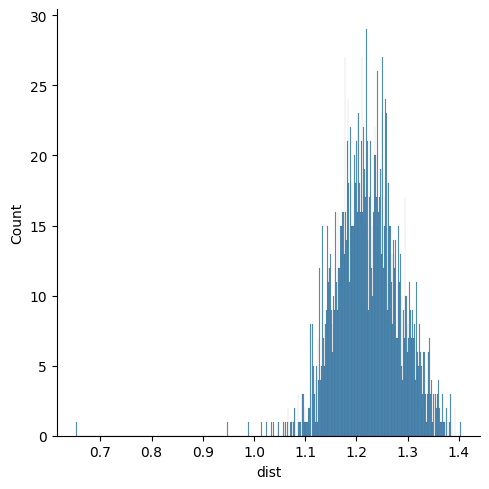

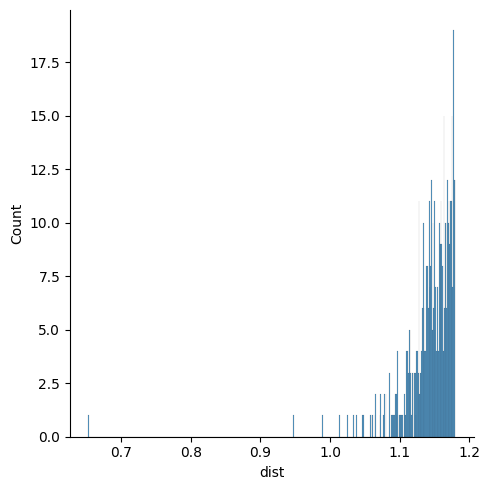

In [ ]:
import seaborn as sns

# sns.displot(wtf, bins=500)
# sns.displot(uk, bins=500)
# sns.displot(skib, bins=500)
# sns.displot(dist_science, bins=500)
# sns.displot(dist_politics, bins=500)
sns.displot(df["dist"], bins=500)
sns.displot(scliced_df["dist"], bins=500)


In [ ]:
sns.displot(df["dist"], bins=500)

In [ ]:
df = df.sort_values(by='dist', ascending=True)

In [ ]:
scliced_df = df[0:-1800]

In [ ]:
df['text_emb'] = None

In [ ]:
import time
start = time.time()
for index, row in df.iterrows():
  if df["dist"][index] != None:
    continue
  try: topic_emb = topics_embeddings[row["search"]]
  except: topic_emb = get_em(row["search"]); topics_embeddings[row["search"]] = topic_emb
  text_emb = get_em(row["content"])
  dist = distance_between_vectors(topic_emb, text_emb)
  df["dist"][index] = dist
end = time.time()
print(f'programm took {end-start} seconds for 2000 requests')
df.head()

In [ ]:
wtf = []
start = time.time()
for index, row in df.iterrows():
  topic_emb = topics_embeddings[topics_list[0]]
  text_emb = df['text_emb'][index]
  dist = distance_between_vectors(topic_emb, text_emb)
  wtf.append(dist)
time.time() - start

0.9400365352630615